In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [57]:
df1 = pd.read_json("../results/7/pt-p0d1/output.json")
df1 = df1.loc[df1['ElpsdNs'] > 0]
df1.shape

(13015, 14)

In [58]:
df2 = pd.read_json("../results/7/pt-p0d2/output.json")
df2 = df2.loc[df2['ElpsdNs'] > 0]
df2.shape

(13168, 14)

In [59]:
df3 = pd.read_json("../results/7/pt-p0d3/output.json")
df3 = df3.loc[df3['ElpsdNs'] > 0]
df3.shape

(12994, 14)

In [60]:
df4 = pd.read_json("../results/7/pt-p0d4/output.json")
df4 = df4.loc[df4['ElpsdNs'] > 0]
df4.shape

(13037, 14)

In [61]:
dfa = pd.concat([df1, df2, df3, df4])
dfa.sort_values("Start")
dfa.shape

(52214, 14)

In [62]:
dfa.head()

,Start,Stop,ElpsdNs,ReqBytes,ResCode,ResBytes,ResErr,ID,Time,Config,OS,ReqStats,Output,Interrupted
0,2022-06-20T00:30:53.326273009Z,2022-06-20T00:30:53.327255037Z,982034.0,6937.0,201.0,241.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-06-20T00:30:53.589598938Z,2022-06-20T00:30:53.59028812Z,689189.0,6937.0,201.0,241.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-06-20T00:30:53.753678071Z,2022-06-20T00:30:53.754415546Z,737475.0,6937.0,201.0,241.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-06-20T00:30:53.765699237Z,2022-06-20T00:30:53.76633919Z,639953.0,6937.0,201.0,241.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-06-20T00:30:53.946347015Z,2022-06-20T00:30:53.94727235Z,925344.0,6937.0,201.0,241.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
dfa['ElpsdMs'] = dfa.apply(lambda row: row.ElpsdNs/1000000, axis=1)
dfa

,Start,Stop,ElpsdNs,ReqBytes,ResCode,ResBytes,ResErr,ID,Time,Config,OS,ReqStats,Output,Interrupted,ElpsdMs
0,2022-06-20T00:30:53.326273009Z,2022-06-20T00:30:53.327255037Z,982034.0,6937.0,201.0,241.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.982034
1,2022-06-20T00:30:53.589598938Z,2022-06-20T00:30:53.59028812Z,689189.0,6937.0,201.0,241.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.689189
2,2022-06-20T00:30:53.753678071Z,2022-06-20T00:30:53.754415546Z,737475.0,6937.0,201.0,241.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.737475
3,2022-06-20T00:30:53.765699237Z,2022-06-20T00:30:53.76633919Z,639953.0,6937.0,201.0,241.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.639953
4,2022-06-20T00:30:53.946347015Z,2022-06-20T00:30:53.94727235Z,925344.0,6937.0,201.0,241.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.925344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13032,2022-06-20T00:35:52.694802648Z,2022-06-20T00:35:52.695944942Z,1142295.0,6937.0,201.0,241.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.142295
13033,2022-06-20T00:35:52.696879681Z,2022-06-20T00:35:52.697741465Z,861793.0,6937.0,201.0,241.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861793
13034,2022-06-20T00:35:52.699984874Z,2022-06-20T00:35:52.700753868Z,768998.0,6937.0,201.0,241.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.768998
13035,2022-06-20T00:35:52.738266321Z,2022-06-20T00:35:52.739460303Z,1193980.0,6937.0,201.0,241.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.193980


In [64]:
dfa['Start'] = pd.to_datetime(dfa['Start'])
dfa['Stop'] = pd.to_datetime(dfa['Stop'])

In [68]:
pct50 = dfa['ElpsdMs'].quantile(.5)
pct50

2779.9428405

<AxesSubplot:xlabel='Start'>

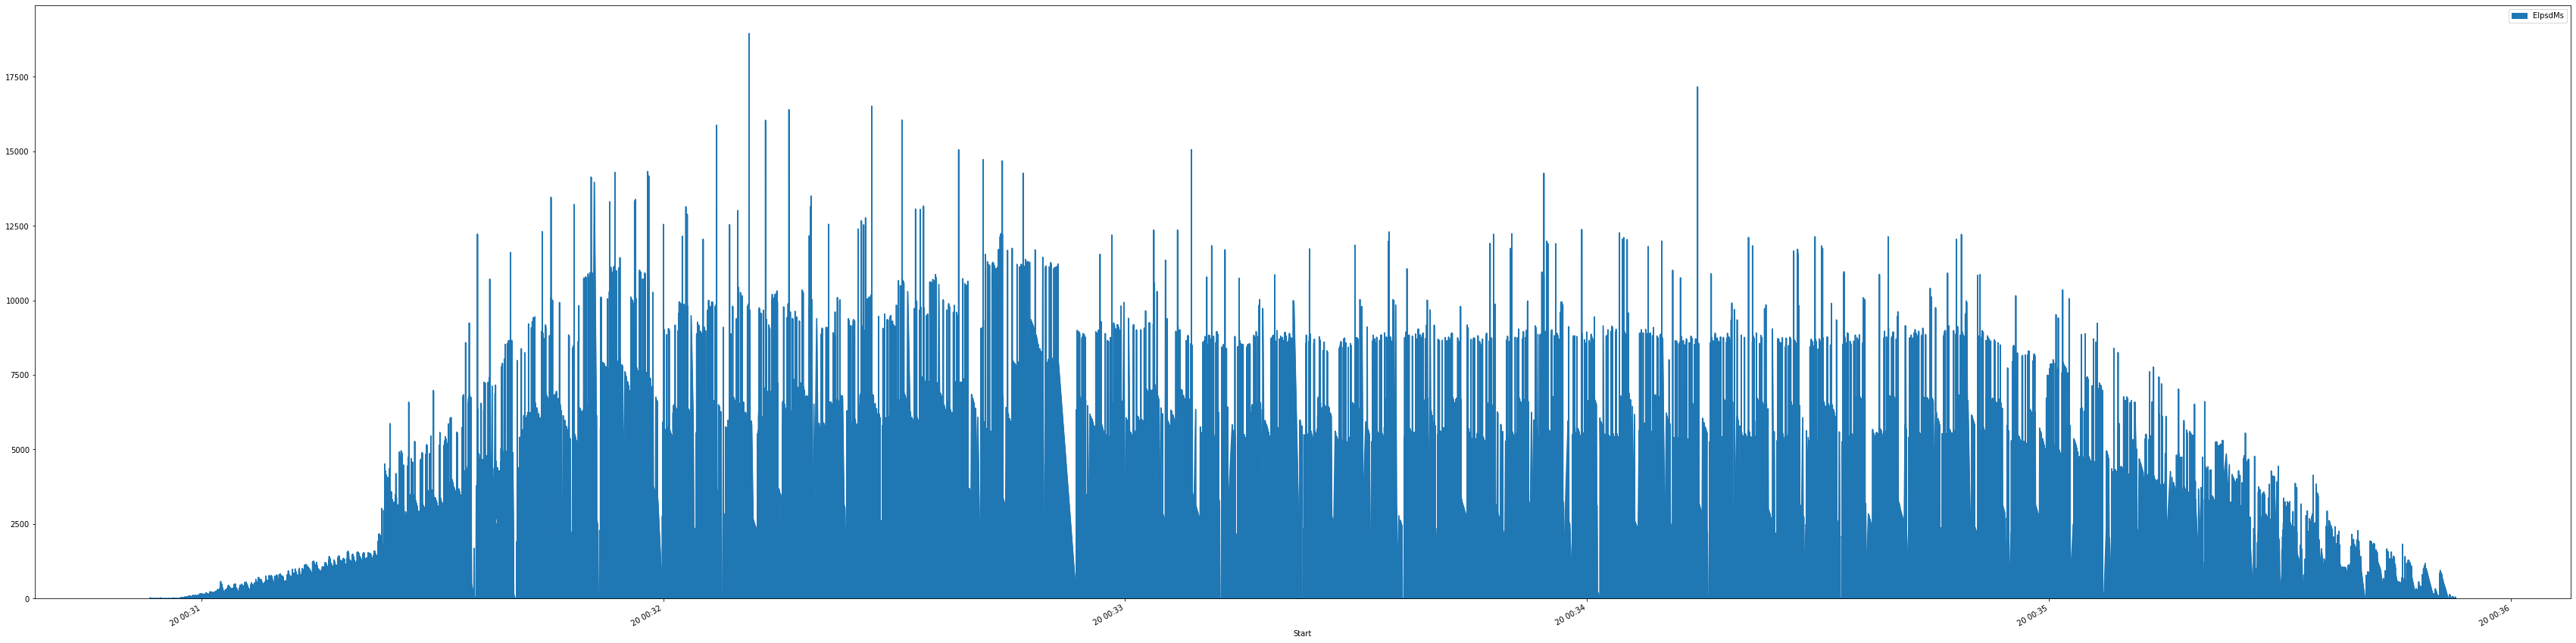

In [69]:
from matplotlib.pyplot import figure

p = dfa.plot
p.area(y='ElpsdMs', x='Start', figsize=(60,16))

In [67]:
df1.dtypes

Start           object
Stop            object
ElpsdNs        float64
ReqBytes       float64
ResCode        float64
ResBytes       float64
ResErr          object
ID              object
Time            object
Config          object
OS              object
ReqStats        object
Output          object
Interrupted    float64
dtype: object